**Data Science Assignment**

In [1]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
sns.set(style="whitegrid")

In [3]:
os.makedirs("csv_files", exist_ok=True)
os.makedirs("outputs", exist_ok=True)

In [4]:
# 2. Load datasets
fear_greed = pd.read_csv("/content/drive/MyDrive/dataset/fear_greed_index.csv")
historical = pd.read_csv("/content/drive/MyDrive/dataset/historical_data.csv")

In [5]:
print("✅ Data Loaded")
print("Fear & Greed shape:", fear_greed.shape)
print("Historical Trades shape:", historical.shape)

✅ Data Loaded
Fear & Greed shape: (2644, 4)
Historical Trades shape: (211224, 16)


In [7]:
# 3. Clean & preprocess
# Convert date columns
historical['Timestamp IST'] = pd.to_datetime(
    historical['Timestamp IST'], format='%d-%m-%Y %H:%M'
)


In [8]:
# Extract just the date (drop time)
historical['date'] = historical['Timestamp IST'].dt.date
fear_greed['date'] = fear_greed['date'].dt.date

In [9]:
# Save cleaned versions
fear_greed.to_csv("/content/drive/MyDrive/dataset/fear_greed_index.csv", index=False)
historical.to_csv("/content/drive/MyDrive/dataset/historical_data.csv", index=False)

In [10]:
print("✅ Data cleaned and saved")

✅ Data cleaned and saved


In [11]:
# 4. Aggregate trader data daily
daily_trader = historical.groupby("date").agg({
    "Closed PnL": "sum",
    "Size USD": "sum",
    "Execution Price": "mean"
}).reset_index()

In [12]:
# Save daily aggregates
daily_trader.to_csv("csv_files/daily_trader.csv", index=False)
print("✅ Daily trader data aggregated")

✅ Daily trader data aggregated


In [13]:
# 5. Merge with Fear & Greed
merged = pd.merge(daily_trader, fear_greed, on="date", how="inner")
# Save merged dataset
merged.to_csv("csv_files/merged_data.csv", index=False)
print("✅ Merged dataset shape:", merged.shape)

✅ Merged dataset shape: (479, 7)


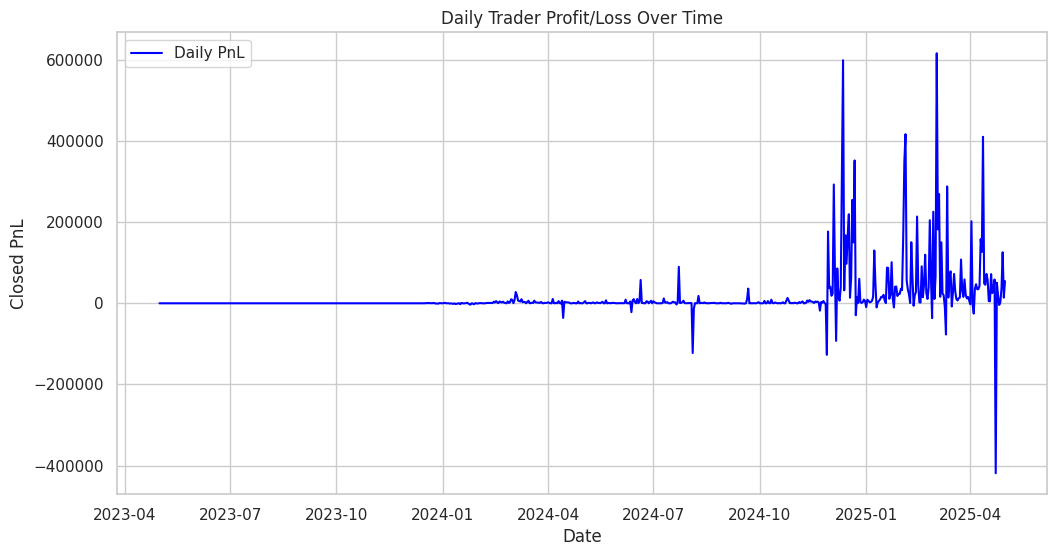

In [14]:
# 6. Exploratory Data Analysis (EDA)
# a) Plot daily PnL over time
plt.figure(figsize=(12,6))
plt.plot(merged['date'], merged['Closed PnL'], label="Daily PnL", color="blue")
plt.title("Daily Trader Profit/Loss Over Time")
plt.xlabel("Date")
plt.ylabel("Closed PnL")
plt.legend()
plt.savefig("outputs/daily_pnl.png")
plt.show()

/tmp/ipython-input-2932939111.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="classification", y="Closed PnL", data=merged, palette="Set2")


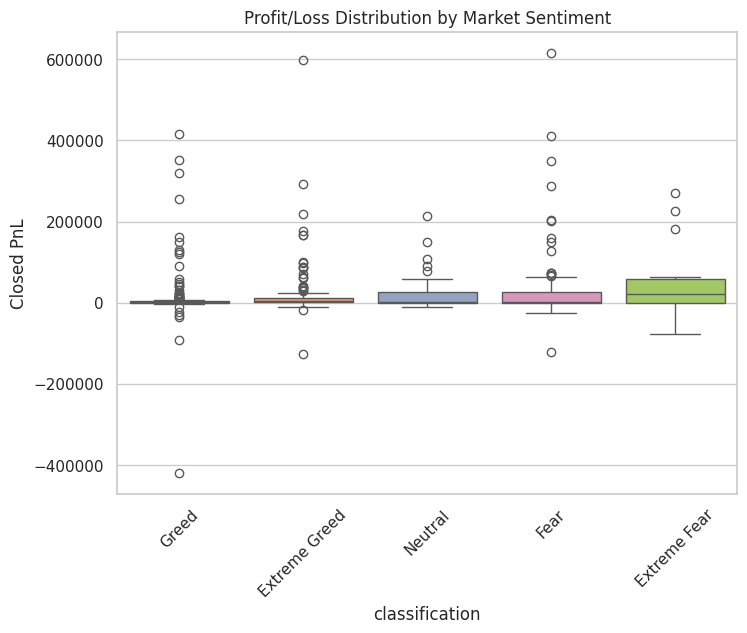

In [15]:
# b) Fear vs Greed Classification Impact on PnL
plt.figure(figsize=(8,6))
sns.boxplot(x="classification", y="Closed PnL", data=merged, palette="Set2")
plt.title("Profit/Loss Distribution by Market Sentiment")
plt.xticks(rotation=45)
plt.savefig("outputs/pnl_vs_sentiment.png")
plt.show()

/tmp/ipython-input-1862409370.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="classification", y="Size USD", data=merged, palette="Set3")


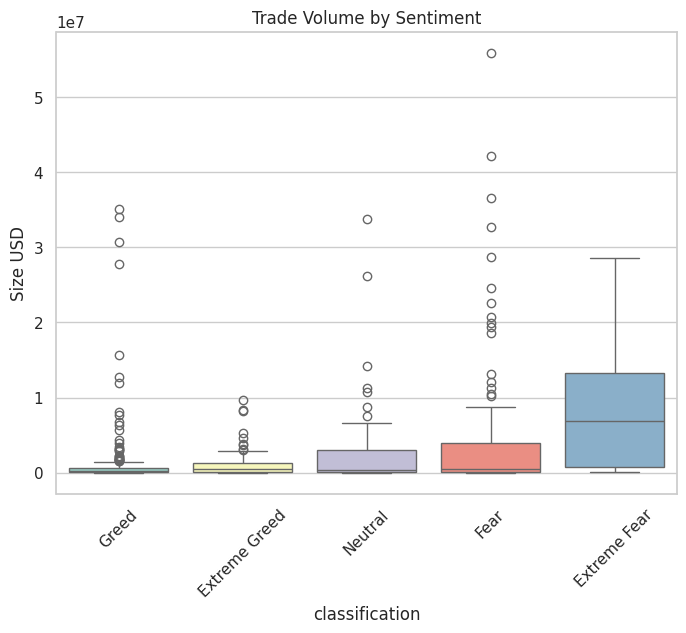

In [16]:
# c) Trade Volume vs Market Sentiment
plt.figure(figsize=(8,6))
sns.boxplot(x="classification", y="Size USD", data=merged, palette="Set3")
plt.title("Trade Volume by Sentiment")
plt.xticks(rotation=45)
plt.savefig("outputs/volume_vs_sentiment.png")
plt.show()

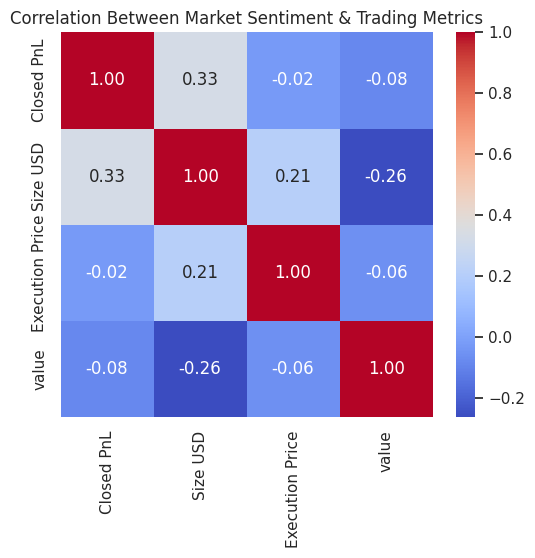

In [17]:
# d) Correlation Heatmap
plt.figure(figsize=(6,5))
corr = merged[['Closed PnL','Size USD','Execution Price','value']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Market Sentiment & Trading Metrics")
plt.savefig("outputs/correlation.png")
plt.show()

In [19]:
from google.colab import files

# Download CSVs
files.download("csv_files/daily_trader.csv")
files.download("csv_files/merged_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>